<a href="https://colab.research.google.com/github/prosperjohn9/EnsembleLearning/blob/main/EnsembleLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0


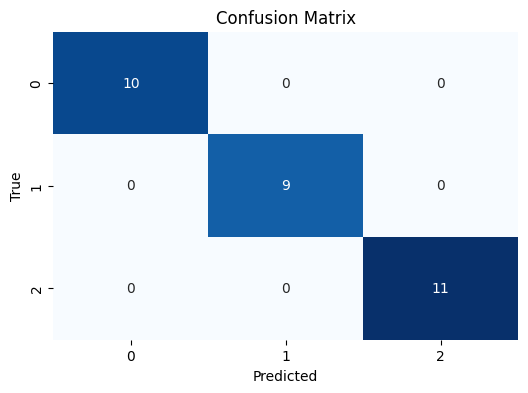

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Define individual models
model1 = RandomForestClassifier(n_estimators=100)
model2 = RandomForestClassifier(n_estimators=200)
model3 = RandomForestClassifier(n_estimators=300)

# Create an ensemble
ensemble = VotingClassifier(
    estimators=[("model1", model1), ("model2", model2), ("model3", model3)],
    voting="hard"
)

# Train the ensemble
ensemble.fit(X_train, y_train)

# Make predictions
y_pred = ensemble.predict(X_test)

# Evaluate the ensemble
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create classification report
cr = classification_report(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Print classification report
print("Classification Report:")
print(cr)